# Plotting the world map

In [18]:
# This installs and imports geopandas
!!pip install geopandas
!!pip install matplotlib
import geopandas as gpd
import matplotlib as plt
import pandas as pd
import numpy as np
countries = gpd.read_file(
               gpd.datasets.get_path("naturalearth_lowres"))
countries.head()

/var/folders/r7/71vqyh_566sb4rd655_gw2300000gn/T/ipykernel_87087/2373480406.py:9: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  gpd.datasets.get_path("naturalearth_lowres"))


,pop_est,continent,name,iso_a3,gdp_md_est,geometry
0,889953.0,Oceania,Fiji,FJI,5496,"MULTIPOLYGON (((180.00000 -16.06713, 180.00000..."
1,58005463.0,Africa,Tanzania,TZA,63177,"POLYGON ((33.90371 -0.95000, 34.07262 -1.05982..."
2,603253.0,Africa,W. Sahara,ESH,907,"POLYGON ((-8.66559 27.65643, -8.66512 27.58948..."
3,37589262.0,North America,Canada,CAN,1736425,"MULTIPOLYGON (((-122.84000 49.00000, -122.9742..."
4,328239523.0,North America,United States of America,USA,21433226,"MULTIPOLYGON (((-122.84000 49.00000, -120.0000..."


<Axes: >

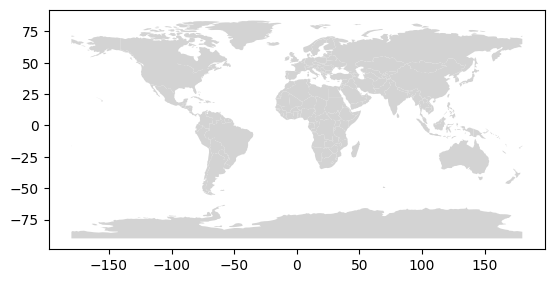

In [6]:
countries.plot(color="lightgrey")

<Axes: >

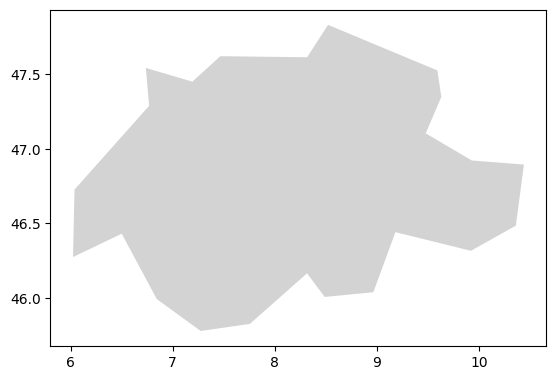

In [7]:
countries[countries["name"] == "Switzerland"].plot(color="lightgrey")

With that, I can plot my current residence, as well as my office: 

My residence is at 47.194397, 8.728698
My office is at 47.35607471661179, 8.515413133925986

In [27]:
data = np.array([['','Label', 'latitude','longitude'],
                ['Row1','Home',47.194397,8.728698],
                ['Row2','Office',47.35607471661179,8.515413133925986]])
                
df = pd.DataFrame(data=data[1:,1:],
                  index=data[1:,0],
                  columns=data[0,1:])

<Axes: >

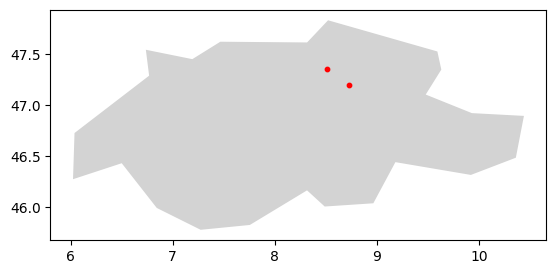

In [30]:
#plotting the two points from df on the swiss map
from shapely.geometry import Point
df['latitude'] = df['latitude'].astype(float)
df['longitude'] = df['longitude'].astype(float)
df['coordinates'] = list(zip(df['longitude'], df['latitude']))
df['coordinates'] = df['coordinates'].apply(Point)
gdf = gpd.GeoDataFrame(df, geometry='coordinates')
gdf.plot(ax=countries[countries["name"] == "Switzerland"].plot(color="lightgrey"), marker='o', color='red', markersize=10)



That seems about right. 